# STUDENTS PERFORMANCE IN EXAMS


# INTRODUCTION
The Students Performance dataset offers comprehensive insights into academic achievements across subjects like Math, Reading, and Writing. Alongside, it encompasses additional attributes that enable analysis of the influence of factors such as gender and catagories on student performance.

For the analysis, we will consider a passing grade of C+ and above as an overall indicator of student success. This approach allows us to evaluate the proportion of students who meet or exceed the minimum passing threshold and investigate potential associations between various attributes and academic outcomes.

# Description:
In this notebook, we are going to predict whether a student pass or fail in academic using various features like gender, parent's education, subject's score etc

The dataset we are going to use is the student's academic info dataset from Kaggle which contains about 1000 rows and 17 features.

The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

# Motivation:
               The main objective of analyzing the Students Performance dataset is to identify how predefined factors impact student performance and provide recommendations for improving overall academic achievement.
             Building such predictive models can help us better understand the academic progress of students as well as the various factors affecting the student's academic growth so educatioanl system and Governments can understand such factor and improve upon them leading to the growth of the educatioanl system.

# Load libraries 

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report 

import seaborn as sns

# Importing Dataset

In [2]:
df =pd.read_csv(r"C:\Users\HP\Documents\ML\Student performance pred\StudentsPerformance.csv")
df

,gender,Division,parent_education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Column information

# Exploratory Data Analysis

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   1000 non-null   object
 1   Division                 1000 non-null   object
 2   parent_education         1000 non-null   object
 3   lunch                    1000 non-null   object
 4   test preparation course  1000 non-null   object
 5   math score               1000 non-null   int64 
 6   reading score            1000 non-null   int64 
 7   writing score            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#Types of columns
df.dtypes

gender                     object
Division                   object
parent_education           object
lunch                      object
test preparation course    object
math score                  int64
reading score               int64
writing score               int64
dtype: object

In [6]:
#Shape of the data set
df.shape

(1000, 8)

## Get the null values

In [7]:
df.isnull().sum()

gender                     0
Division                   0
parent_education           0
lunch                      0
test preparation course    0
math score                 0
reading score              0
writing score              0
dtype: int64

In [8]:
#checking size (col,lin) of dataset
print("Number of rows: " + str(df.shape[0]))
print("Number of Columns: " + str(df.shape[1]))

Number of rows: 1000
Number of Columns: 8


In [9]:
#checking how many different values there are per column
df.nunique()

gender                      2
Division                    5
parent_education            6
lunch                       2
test preparation course     2
math score                 81
reading score              72
writing score              77
dtype: int64

In [10]:
# create a new column called average_score 
df["average_score"] = round((df["math score"] + df["reading score"]+ df["writing score"])/3,1)
df["average_score"]

0      72.7
1      82.3
2      92.7
3      49.3
4      76.3
       ... 
995    94.0
996    57.3
997    65.0
998    74.3
999    83.0
Name: average_score, Length: 1000, dtype: float64

In [11]:
# create a grade column that contains the grade of students according to average score
def grade_system(score):
    if score >= 90: return "A+"
    elif score >= 85: return "A"
    elif score >= 80: return "A-"
    elif score >= 75: return "B+"
    elif score >= 70: return "B"
    elif score >= 65: return "B-"
    elif score >= 60: return "C+"
    elif score >= 55: return "C"
    elif score >= 50: return "C-"
    elif score >= 45: return "D+"
    elif score >= 40: return "D"
    elif score >= 35: return "D-"
    else: return "F"
    
df["grade"] = df["average_score"].apply(grade_system)

In [12]:
# creating a status column
df["status"] = df["average_score"].map(lambda x: "Passed" if x>=65 else "Failed")
df["status"]

0      Passed
1      Passed
2      Passed
3      Failed
4      Passed
        ...  
995    Passed
996    Failed
997    Passed
998    Passed
999    Passed
Name: status, Length: 1000, dtype: object

# Visualisation 

## Student pass in maths exam

In [13]:
df["Math_PassStatus"]=np.where(df["math score"]>65,"P","F")
df.Math_PassStatus.value_counts()

Math_PassStatus
P    517
F    483
Name: count, dtype: int64

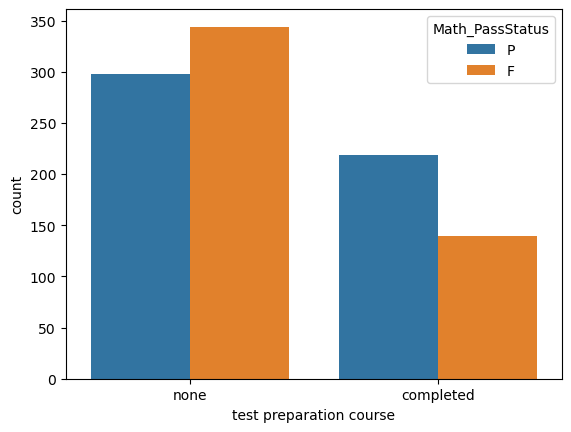

In [14]:
graph=sns.countplot(data=df,x="test preparation course",hue="Math_PassStatus",palette="tab10")
_=plt.setp(graph.get_xticklabels(),rotation=0)
plt.show()

## Student pass in reading exam

In [15]:
df["Reading_PassStatus"]=np.where(df["reading score"]>65,"P","F")
df.Reading_PassStatus.value_counts()

Reading_PassStatus
P    608
F    392
Name: count, dtype: int64

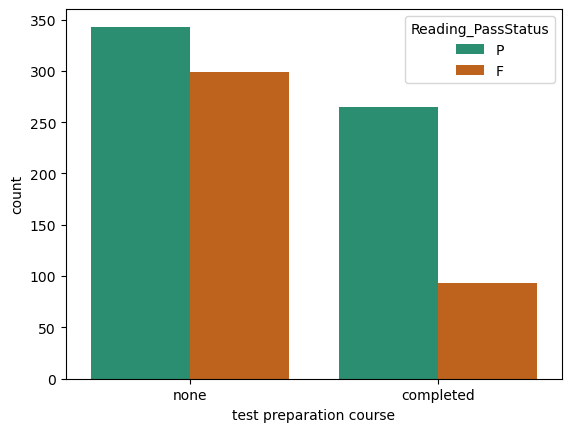

In [16]:
graph=sns.countplot(data=df,x="test preparation course",hue="Reading_PassStatus",palette="Dark2")
_=plt.setp(graph.get_xticklabels(),rotation=0)
plt.show()

## Student pass in writing exam

In [17]:
df["Writing_PassStatus"]=np.where(df["writing score"]>65,"P","F")
df.Writing_PassStatus.value_counts()

Writing_PassStatus
P    592
F    408
Name: count, dtype: int64

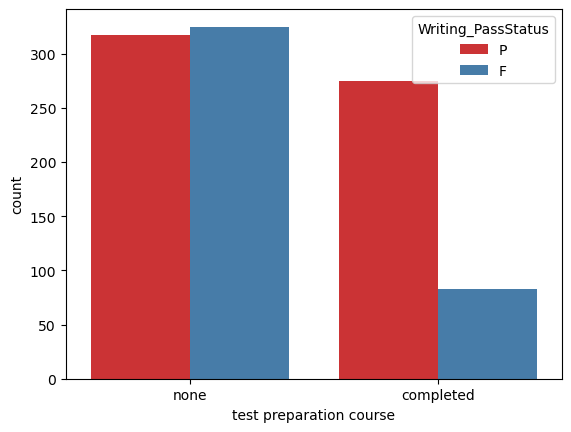

In [18]:
graph=sns.countplot(x='test preparation course', data = df, hue='Writing_PassStatus', palette='Set1')
_=plt.setp(graph.get_xticklabels(),rotation=0)
plt.show()

## Student Failed in all sub. 

In [19]:
df["OverAll_PassStatus"]=df.apply(lambda x: "P"if x["math score"]=="P"
                                               and x["reading score"]=="P"
                                               and x["writing score"]=="P" else "F",axis=1)
df.OverAll_PassStatus.value_counts()

OverAll_PassStatus
F    1000
Name: count, dtype: int64

## Graph the student Failed in overall sub.

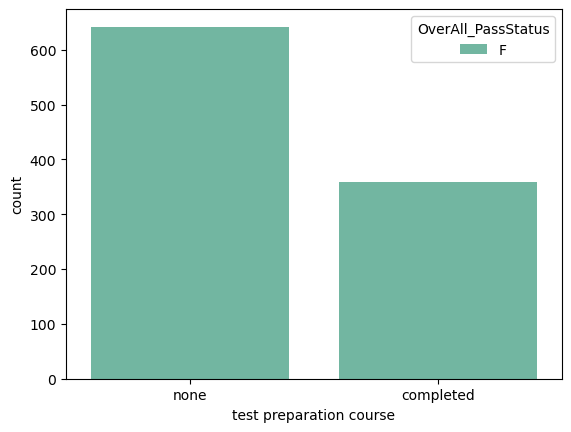

In [20]:
graph=sns.countplot(data=df,x="test preparation course", hue= "OverAll_PassStatus", palette="Set2")
_=plt.setp(graph.get_xticklabels(),rotation=0)
plt.show()

## Get the total marks and percentage marks  

In [21]:
Total_Marks= df["Total_Marks"]=df["math score"]+df["reading score"]+df["writing score"]
df["Percentage"]=df["Total_Marks"]/3

Total_Marks

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Length: 1000, dtype: int64

# Separting Numeric and category Data

In [22]:
df

,gender,Division,parent_education,lunch,test preparation course,math score,reading score,writing score,average_score,grade,status,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7,B,Passed,P,P,P,F,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.3,A-,Passed,P,P,P,F,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.7,A+,Passed,P,P,P,F,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3,D+,Failed,F,F,F,F,148,49.333333
4,male,group C,some college,standard,none,76,78,75,76.3,B+,Passed,P,P,P,F,229,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0,A+,Passed,P,P,P,F,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.3,C,Failed,F,F,F,F,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.0,B-,Passed,F,P,F,F,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.3,B,Passed,P,P,P,F,223,74.333333


In [23]:
df_num=df.select_dtypes(['int','float'])
df_num

,math score,reading score,writing score,average_score,Total_Marks,Percentage
0,72,72,74,72.7,218,72.666667
1,69,90,88,82.3,247,82.333333
2,90,95,93,92.7,278,92.666667
3,47,57,44,49.3,148,49.333333
4,76,78,75,76.3,229,76.333333
...,...,...,...,...,...,...
995,88,99,95,94.0,282,94.000000
996,62,55,55,57.3,172,57.333333
997,59,71,65,65.0,195,65.000000
998,68,78,77,74.3,223,74.333333


In [24]:
df_object=df.select_dtypes(['object'])
df_object

,gender,Division,parent_education,lunch,test preparation course,grade,status,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,B,Passed,P,P,P,F
1,female,group C,some college,standard,completed,A-,Passed,P,P,P,F
2,female,group B,master's degree,standard,none,A+,Passed,P,P,P,F
3,male,group A,associate's degree,free/reduced,none,D+,Failed,F,F,F,F
4,male,group C,some college,standard,none,B+,Passed,P,P,P,F
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,A+,Passed,P,P,P,F
996,male,group C,high school,free/reduced,none,C,Failed,F,F,F,F
997,female,group C,high school,free/reduced,completed,B-,Passed,F,P,F,F
998,female,group D,some college,standard,completed,B,Passed,P,P,P,F


# Using Label Encoder for converting category data into numeric

In [25]:
#lebel encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [26]:
for i in df_object:
    df_object[i]=le.fit_transform(df_object[i]) 
#convert the cat to label encoder
df_object


,gender,Division,parent_education,lunch,test preparation course,grade,status,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,0,1,1,1,1,3,1,1,1,1,0
1,0,2,4,1,0,2,1,1,1,1,0
2,0,1,3,1,1,1,1,1,1,1,0
3,1,0,0,0,1,10,0,0,0,0,0
4,1,2,4,1,1,4,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,1,1,1,1,1,0
996,1,2,2,0,1,6,0,0,0,0,0
997,0,2,2,0,0,5,1,0,1,0,0
998,0,3,4,1,0,3,1,1,1,1,0


# feacture scalling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [29]:
x_scaled=sc.fit_transform(df_num)
x_scaled



array([[ 0.39002351,  0.19399858,  0.39149181,  0.34597732,  0.34357423,
         0.34357423],
       [ 0.19207553,  1.42747598,  1.31326868,  1.01965837,  1.0219275 ,
         1.0219275 ],
       [ 1.57771141,  1.77010859,  1.64247471,  1.7494795 ,  1.74706375,
         1.74706375],
       ...,
       [-0.46775108,  0.12547206, -0.20107904, -0.19437102, -0.19443008,
        -0.19443008],
       [ 0.12609287,  0.60515772,  0.58901542,  0.4582575 ,  0.46053169,
         0.46053169],
       [ 0.71993682,  1.15336989,  1.18158627,  1.06878094,  1.06871048,
         1.06871048]])

In [30]:
df_scaled = pd.DataFrame(data=x_scaled, columns=df_num.columns)
print(df_scaled)



     math score  reading score  writing score  average_score  Total_Marks  \
0      0.390024       0.193999       0.391492       0.345977     0.343574   
1      0.192076       1.427476       1.313269       1.019658     1.021927   
2      1.577711       1.770109       1.642475       1.749480     1.747064   
3     -1.259543      -0.833899      -1.583744      -1.296120    -1.293830   
4      0.653954       0.605158       0.457333       0.598608     0.600881   
..          ...            ...            ...            ...          ...   
995    1.445746       2.044215       1.774157       1.840707     1.840630   
996   -0.269803      -0.970952      -0.859491      -0.734719    -0.732434   
997   -0.467751       0.125472      -0.201079      -0.194371    -0.194430   
998    0.126093       0.605158       0.589015       0.458257     0.460532   
999    0.719937       1.153370       1.181586       1.068781     1.068710   

     Percentage  
0      0.343574  
1      1.021927  
2      1.747064  
3  

# Concatenate Numerical and Categorical Columns

In [31]:
df_new=pd.concat([df_scaled,df_object],axis=1)
df_new

,math score,reading score,writing score,average_score,Total_Marks,Percentage,gender,Division,parent_education,lunch,test preparation course,grade,status,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,0.390024,0.193999,0.391492,0.345977,0.343574,0.343574,0,1,1,1,1,3,1,1,1,1,0
1,0.192076,1.427476,1.313269,1.019658,1.021927,1.021927,0,2,4,1,0,2,1,1,1,1,0
2,1.577711,1.770109,1.642475,1.749480,1.747064,1.747064,0,1,3,1,1,1,1,1,1,1,0
3,-1.259543,-0.833899,-1.583744,-1.296120,-1.293830,-1.293830,1,0,0,0,1,10,0,0,0,0,0
4,0.653954,0.605158,0.457333,0.598608,0.600881,0.600881,1,2,4,1,1,4,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,1.840707,1.840630,1.840630,0,4,3,1,0,1,1,1,1,1,0
996,-0.269803,-0.970952,-0.859491,-0.734719,-0.732434,-0.732434,1,2,2,0,1,6,0,0,0,0,0
997,-0.467751,0.125472,-0.201079,-0.194371,-0.194430,-0.194430,0,2,2,0,0,5,1,0,1,0,0
998,0.126093,0.605158,0.589015,0.458257,0.460532,0.460532,0,3,4,1,0,3,1,1,1,1,0


# split the data 

In [32]:
# get a copy of the original dataset 
students_df = df_new.copy()
students_df

,math score,reading score,writing score,average_score,Total_Marks,Percentage,gender,Division,parent_education,lunch,test preparation course,grade,status,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,0.390024,0.193999,0.391492,0.345977,0.343574,0.343574,0,1,1,1,1,3,1,1,1,1,0
1,0.192076,1.427476,1.313269,1.019658,1.021927,1.021927,0,2,4,1,0,2,1,1,1,1,0
2,1.577711,1.770109,1.642475,1.749480,1.747064,1.747064,0,1,3,1,1,1,1,1,1,1,0
3,-1.259543,-0.833899,-1.583744,-1.296120,-1.293830,-1.293830,1,0,0,0,1,10,0,0,0,0,0
4,0.653954,0.605158,0.457333,0.598608,0.600881,0.600881,1,2,4,1,1,4,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,1.840707,1.840630,1.840630,0,4,3,1,0,1,1,1,1,1,0
996,-0.269803,-0.970952,-0.859491,-0.734719,-0.732434,-0.732434,1,2,2,0,1,6,0,0,0,0,0
997,-0.467751,0.125472,-0.201079,-0.194371,-0.194430,-0.194430,0,2,2,0,0,5,1,0,1,0,0
998,0.126093,0.605158,0.589015,0.458257,0.460532,0.460532,0,3,4,1,0,3,1,1,1,1,0


In [33]:
# removing unnecessary columns 
students_df.drop(columns=["average_score","grade","Total_Marks","parent_education","Percentage","Math_PassStatus", "Reading_PassStatus","Writing_PassStatus",
                          "OverAll_PassStatus"], inplace=True)


In [34]:
students_df

,math score,reading score,writing score,gender,Division,lunch,test preparation course,status
0,0.390024,0.193999,0.391492,0,1,1,1,1
1,0.192076,1.427476,1.313269,0,2,1,0,1
2,1.577711,1.770109,1.642475,0,1,1,1,1
3,-1.259543,-0.833899,-1.583744,1,0,0,1,0
4,0.653954,0.605158,0.457333,1,2,1,1,1
...,...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,0,4,1,0,1
996,-0.269803,-0.970952,-0.859491,1,2,0,1,0
997,-0.467751,0.125472,-0.201079,0,2,0,0,1
998,0.126093,0.605158,0.589015,0,3,1,0,1


In [35]:
y=students_df.iloc[:,7:8]
y

,status
0,1
1,1
2,1
3,0
4,1
...,...
995,1
996,0
997,1
998,1


In [36]:
y.value_counts()

status
1         601
0         399
Name: count, dtype: int64

In [37]:
x=students_df.drop('status',axis=1)
x

,math score,reading score,writing score,gender,Division,lunch,test preparation course
0,0.390024,0.193999,0.391492,0,1,1,1
1,0.192076,1.427476,1.313269,0,2,1,0
2,1.577711,1.770109,1.642475,0,1,1,1
3,-1.259543,-0.833899,-1.583744,1,0,0,1
4,0.653954,0.605158,0.457333,1,2,1,1
...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,0,4,1,0
996,-0.269803,-0.970952,-0.859491,1,2,0,1
997,-0.467751,0.125472,-0.201079,0,2,0,0
998,0.126093,0.605158,0.589015,0,3,1,0


C:\Users\HP\AppData\Local\Temp\ipykernel_14876\3517184329.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


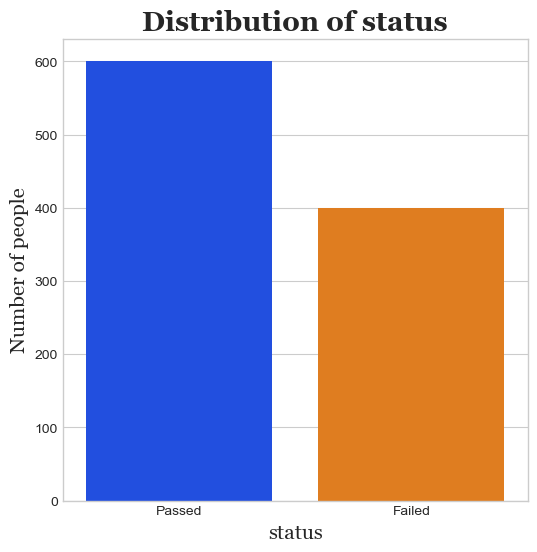

In [38]:
status = df['status'].value_counts()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 6))
sns.barplot(x=status.index, y=status.values, palette='bright')
plt.title('Distribution of status', fontdict={
          'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('status', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

# *Since the Data is imbalanced , need to do sampling (either Oversampling or Undersampling)

In [39]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)

In [40]:
x=x_ros
y=y_ros

In [41]:
y.value_counts()

status
0         601
1         601
Name: count, dtype: int64

# Importing the models and Train them 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()


In [45]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

# Logistic Regression

In [46]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       184
           1       0.99      0.99      0.99       177

    accuracy                           0.99       361
   macro avg       0.99      0.99      0.99       361
weighted avg       0.99      0.99      0.99       361



LogisticRegression()

In [79]:
# accuracy score on the train data
y_pred = logreg.predict(x_train)
Train_Accuracy_logreg = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_logreg*100,2),"%")

Accuracy score of the training data :  99.29 %


In [80]:
# accuracy score on the test data
y_pred_on_test_data = logreg.predict(x_test)
Test_Accuracy_logreg = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_logreg*100,2),"%")

Accuracy score of the test data :  98.89 %


In [47]:
from sklearn.linear_model import Ridge, Lasso

In [48]:
#L2 regularization

In [49]:
l2=Ridge(alpha=5)
l2.fit(x_train,y_train)

Ridge(alpha=5)

In [50]:
train = l2.score(x_train, y_train) # training acc
test = l2.score(x_test, y_test) # testing acc
print(f"Traning Result -: {train}")
print(f"Test Result -: {test}")

Traning Result -: 0.6593050183323347
Test Result -: 0.6086372600965525


In [51]:
#hypertuning lambda/ alpha value
for i in range(1,30):
 l2=Ridge(alpha=i)
 l2.fit(x_train,y_train)
 test = l2.score(x_test, y_test)
 print(f"value of lambda {i} test score {test}")

value of lambda 1 test score 0.6082835494336296
value of lambda 2 test score 0.6083761629191137
value of lambda 3 test score 0.6084658591789867
value of lambda 4 test score 0.6085528331955818
value of lambda 5 test score 0.6086372600965525
value of lambda 6 test score 0.608719297750834
value of lambda 7 test score 0.6087990889502475
value of lambda 8 test score 0.6088767632546463
value of lambda 9 test score 0.6089524385617643
value of lambda 10 test score 0.6090262224501931
value of lambda 11 test score 0.6090982133341559
value of lambda 12 test score 0.6091685014611721
value of lambda 13 test score 0.6092371697778147
value of lambda 14 test score 0.6093042946841132
value of lambda 15 test score 0.6093699466934697
value of lambda 16 test score 0.609434191012024
value of lambda 17 test score 0.6094970880490311
value of lambda 18 test score 0.6095586938679131
value of lambda 19 test score 0.6096190605860834
value of lambda 20 test score 0.6096782367303772
value of lambda 21 test score 0

In [52]:
#final l2 model with best lambda value 

In [53]:
l2=Ridge(alpha=11)
l2.fit(x_train,y_train)

Ridge(alpha=11)

In [54]:
train = l2.score(x_train, y_train) # training acc
test = l2.score(x_test, y_test) # testing acc
print(f"Traning Result -: {train}")
print(f"Test Result -: {test}")


Traning Result -: 0.6592703981960475
Test Result -: 0.6090982133341559


In [55]:
#l1 regularization (LASSO - Least absolute and selection operator)

In [56]:
for i in range(0,50):
 l1=Lasso(alpha=i)
 l1.fit(x_train,y_train)
 test = l1.score(x_test, y_test)
 print(f"value of lambda {i} test score {test}")

value of lambda 0 test score 0.6081878007750476
value of lambda 1 test score -0.0007683550377146631
value of lambda 2 test score -0.0007683550377146631
value of lambda 3 test score -0.0007683550377146631
value of lambda 4 test score -0.0007683550377146631
value of lambda 5 test score -0.0007683550377146631
value of lambda 6 test score -0.0007683550377146631
value of lambda 7 test score -0.0007683550377146631
value of lambda 8 test score -0.0007683550377146631
value of lambda 9 test score -0.0007683550377146631
value of lambda 10 test score -0.0007683550377146631
value of lambda 11 test score -0.0007683550377146631
value of lambda 12 test score -0.0007683550377146631
value of lambda 13 test score -0.0007683550377146631
value of lambda 14 test score -0.0007683550377146631
value of lambda 15 test score -0.0007683550377146631
value of lambda 16 test score -0.0007683550377146631
value of lambda 17 test score -0.0007683550377146631
value of lambda 18 test score -0.0007683550377146631
value o

In [57]:
#final Lasso model with best value of lambda
l1=Lasso(alpha=0)
l1.fit(x_train,y_train)
train = l1.score(x_train, y_train)
test = l1.score(x_test, y_test) # testing acc
print(f"Training Result -: {train}")
print(f"Test Result -: {test}")

Training Result -: 0.6593160180517705
Test Result -: 0.6081878007750476


# Decision Tree

In [58]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       184
           1       0.98      0.97      0.97       177

    accuracy                           0.98       361
   macro avg       0.98      0.98      0.98       361
weighted avg       0.98      0.98      0.98       361



DecisionTreeClassifier()

In [78]:
# accuracy score on the train data
y_pred = dt.predict(x_train)
Train_Accuracy_dt = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_dt*100,2),"%")

Accuracy score of the training data :  100.0 %


In [77]:
# accuracy score on the test data
y_pred_on_test_data = dt.predict(x_test)
Test_Accuracy_dt = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_dt*100,2),"%")

Accuracy score of the test data :  97.51 %


# KNeighborsClassifier

In [59]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       184
           1       0.97      0.95      0.96       177

    accuracy                           0.96       361
   macro avg       0.96      0.96      0.96       361
weighted avg       0.96      0.96      0.96       361



KNeighborsClassifier()

In [72]:
# accuracy score on the train data
y_pred = knn.predict(x_train)
Train_Accuracy_knn = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_knn*100,2),"%")

Accuracy score of the training data :  97.62 %


In [73]:
# accuracy score on the test data
y_pred_on_test_data = knn.predict(x_test)
Test_Accuracy_knn = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_knn*100,2),"%")

Accuracy score of the test data :  96.12 %


# SVM

In [60]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       184
           1       0.96      0.98      0.97       177

    accuracy                           0.97       361
   macro avg       0.97      0.97      0.97       361
weighted avg       0.97      0.97      0.97       361



SVC()

In [75]:
# accuracy score on the train data
y_pred = svm.predict(x_train)
Train_Accuracy_svm = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_svm*100,2),"%")

Accuracy score of the training data :  98.69 %


In [76]:
# accuracy score on the test data
y_pred_on_test_data = svm.predict(x_test)
Test_Accuracy_svm = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_svm*100,2),"%")

Accuracy score of the test data :  96.95 %


# gridsearch using logistic regression

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    # C is the Regularization Parameter #Techinque to convert overfit to good fit is Regularization 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [63]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


    #estimator:This is the machine learning model for which you want to perform hyperparameter tuning. In your case, 
    #It's referred to as logreg, which suggests it's a logistic regression model. 

    #

In [64]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [65]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:  0.9976260918568611


In [66]:
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  1.0


In [81]:
ML_Model=['Linear Regression','Decision Tree','k-Nearest Neighbors Regression','svm']

Train_Accuracy=[Train_Accuracy_logreg,Train_Accuracy_dt,Train_Accuracy_knn,Train_Accuracy_svm]
Train_ACC = [round(i,3) for i in Train_Accuracy]

Test_Accuracy=[Test_Accuracy_logreg,Test_Accuracy_dt,Test_Accuracy_knn,Test_Accuracy_svm]
Test_ACC = [round(i,3) for i in Test_Accuracy]


In [82]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': Train_ACC,
    'Test Accuracy': Test_ACC},index=[1,2,3,4])

In [83]:
results

,ML Model,Train Accuracy,Test Accuracy
1,Linear Regression,0.993,0.989
2,Decision Tree,1.000,0.975
3,k-Nearest Neighbors Regression,0.976,0.961
4,svm,0.987,0.970


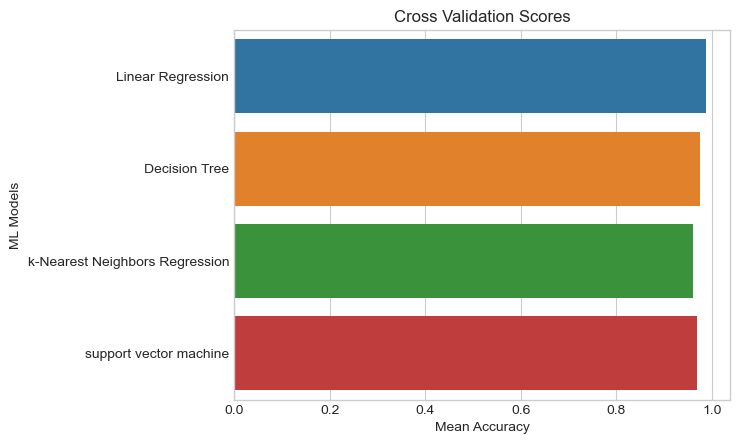

In [84]:
cv_results = pd.DataFrame({
    "Cross Validation Means": [Test_Accuracy_logreg,Test_Accuracy_dt,Test_Accuracy_knn,Test_Accuracy_svm],
    "ML Models": ['Linear Regression','Decision Tree','k-Nearest Neighbors Regression', 'support vector machine']
})

# Use sns.barplot with data as the DataFrame
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)

# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Show the plot
plt.show()

# conclusion

In this project, we build various models like logistic regression, knn classifier,decision tree classifier & svm

A Linear Regression Classifier gives the highest accuracy score of 98.00 percent among all the ML Models.

So for the Students Performance prediction project DecisionTreeClassifier is best model